# Imports

Begin by importing the required libraries.

In [28]:
! virtualenv venv
! powershell .\start.ps1

created virtual environment CPython3.10.6.final.0-64 in 1694ms
  creator CPython3Windows(dest=C:\Users\juinl\Documents\GitHub\Analysis-of-Algorithms\Dijkstra Shortest Path Search\venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\juinl\AppData\Local\pypa\virtualenv)
    added seed packages: Pillow==9.2.0, contourpy==1.0.5, cycler==0.11.0, fonttools==4.37.4, kiwisolver==1.4.4, matplotlib==3.6.1, numpy==1.23.3, packaging==21.3, pandas==1.5.0, pip==22.2.2, pyparsing==3.0.9, python_dateutil==2.8.2, pytz==2022.4, seaborn==0.12.0, setuptools==65.3.0, six==1.16.0, wheel==0.37.1
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [29]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Import the generated dataset.

In [80]:
A = pd.read_csv("./datasets/PartA.csv", header=0)
B = pd.read_csv("./datasets/PartB.csv", header=0)

# Defining Parameters

In our empirical analysis on Dijkstra's Shortest Path Search Algorithm, the following defines the parameters used:
* Graph type: *G(V, E)* where *G* is a **directed graph** which ranges from **sparsely connected** to **strongly connected**.
* Number of vertices, *V* ranges from **100 to 2500**.
* Total number of edges, *E* ranges from (2 to *V*, in multiples of 2) * *V*.
* Each vertex will have 1 to *V* edges. The number of edges each vertex has is consistent, i.e. a graph where a vertex has 5 edges guarantees that all other vertex has 5 edges.



# Part A

We plot the number of key comparisons against number of vertices, for Shortest Path Search Algorithm applied on adjacency matrix and using array-based priority queue.

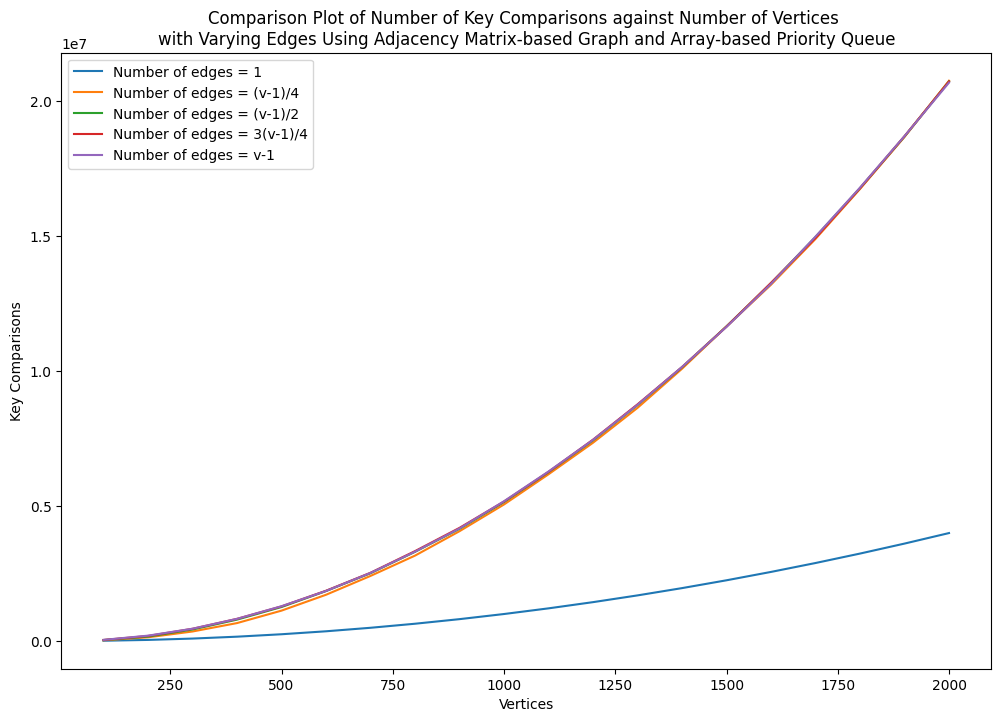

In [86]:
verticesMegaList = [[],[],[],[],[]]
keyCompMegaList = [[],[],[],[],[]]

count = 0
for index, row in A.iterrows():
    keyCompMegaList[count].append(int(row["Key Comparisons"]))
    verticesMegaList[count].append(int(row["Vertices"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["1", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(keyCompMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Key Comparisons"] = keyCompMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Key Comparisons", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Comparison Plot of Number of Key Comparisons against Number of Vertices \nwith Varying Edges Using Adjacency Matrix-based Graph and Array-based Priority Queue")



We plot the elapsed time against number of vertices, for Shortest Path Search Algorithm applied on adjacency matrix and using array-based priority queue.

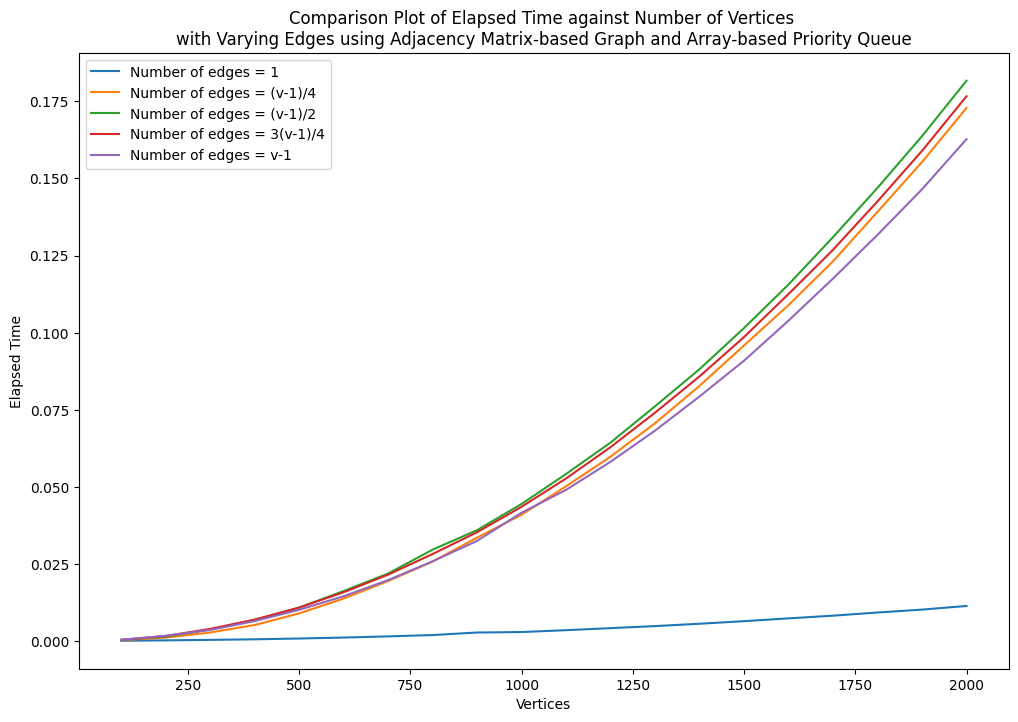

In [87]:
timeMegaList = [[],[],[],[],[]]

count = 0
for index, row in A.iterrows():
    timeMegaList[count].append(float(row["Elapsed Time"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["1", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(timeMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Elapsed Time"] = timeMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Elapsed Time", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Comparison Plot of Elapsed Time against Number of Vertices \nwith Varying Edges using Adjacency Matrix-based Graph and Array-based Priority Queue")



### Theoretical Analysis

We expect Dijkstra's algorithm to perform at a time complexity of ***O(|V|<sup>3</sup>)*** when using adjacency matrix with custom array-based priority queue.

Derivation:
1. Since the graph is defined as at minimum, connected and directed, the starting index does not matter and we are guaranteed to traverse through at least *|V|* vertices.

2. On each traversal, we have to check, for the current vertex, whether the other vertices are connected to it. This is done by accessing the matrix *|V|* - 1 times. 

3. In addition, on each traversal, we are dequeuing from priority queue to expand the vertex with smallest distance from starting vertex so far. At worst case, the queue is sized at most *|V||V - 3| / 2* and the vertex of interest is at the last index of the queue. This incurs a search cost of ***O(|V|<sup>2</sup>)***.

Therefore, our hypothesis for Dijkstra's algorithm time complexity is ***O(|V|)*** x (***O(|V|<sup>2</sup>)*** + ***O(|V| - 1)*** = ***O(|V|<sup>3</sup>)***.

**<u>Proof that Priority Queue is sized at most *|V||V - 3| / 2*</u>**

We consider a densely connected graph. On each iteration, we enqueue *|V| - (|V| - i)* and dequeue 1 total number of vertices, where *i* is the number of visited vertices.

We can rewrite the equation as: <br/>
<img src="./media/Equation.png"></img>





# Part B

We plot the number of key comparisons against number of vertices, for Shortest Path Search Algorithm applied on adjacency list and using min heap priority queue.

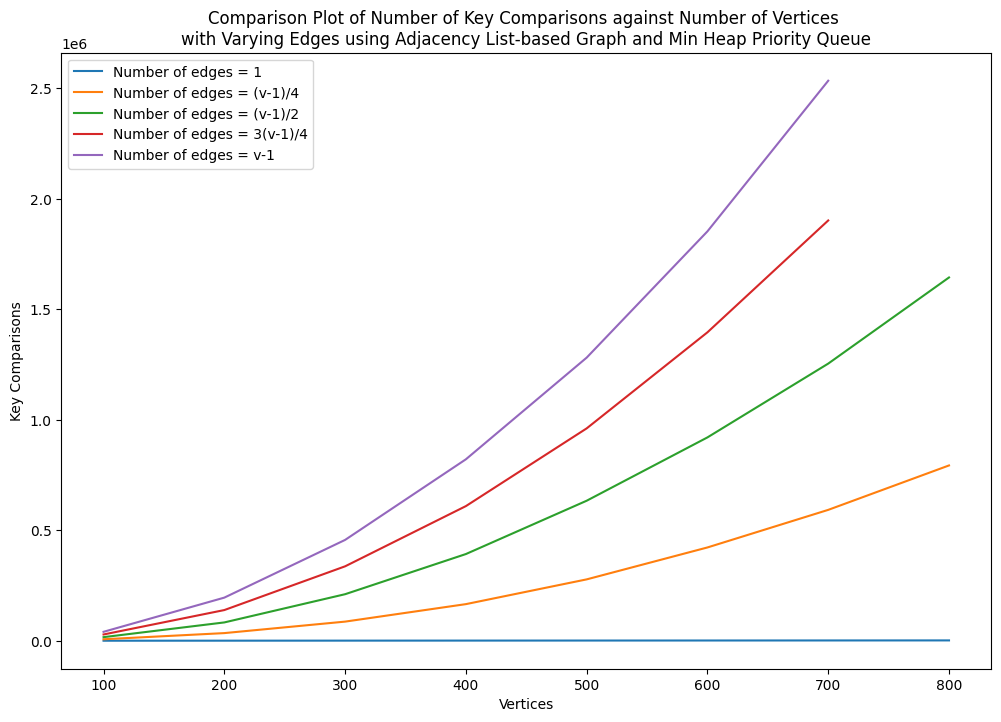

In [88]:
keyCompMegaList = [[],[],[],[],[]]
verticesMegaList = [[],[],[],[],[]]

count = 0
for index, row in B.iterrows():
    keyCompMegaList[count].append(int(row["Key Comparisons"]))
    verticesMegaList[count].append(int(row["Vertices"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["1", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(keyCompMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Key Comparisons"] = keyCompMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Key Comparisons", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Comparison Plot of Number of Key Comparisons against Number of Vertices \nwith Varying Edges using Adjacency List-based Graph and Min Heap Priority Queue")

We plot the elapsed time against number of vertices, for Shortest Path Search Algorithm applied on adjacency list and using min heap priority queue.

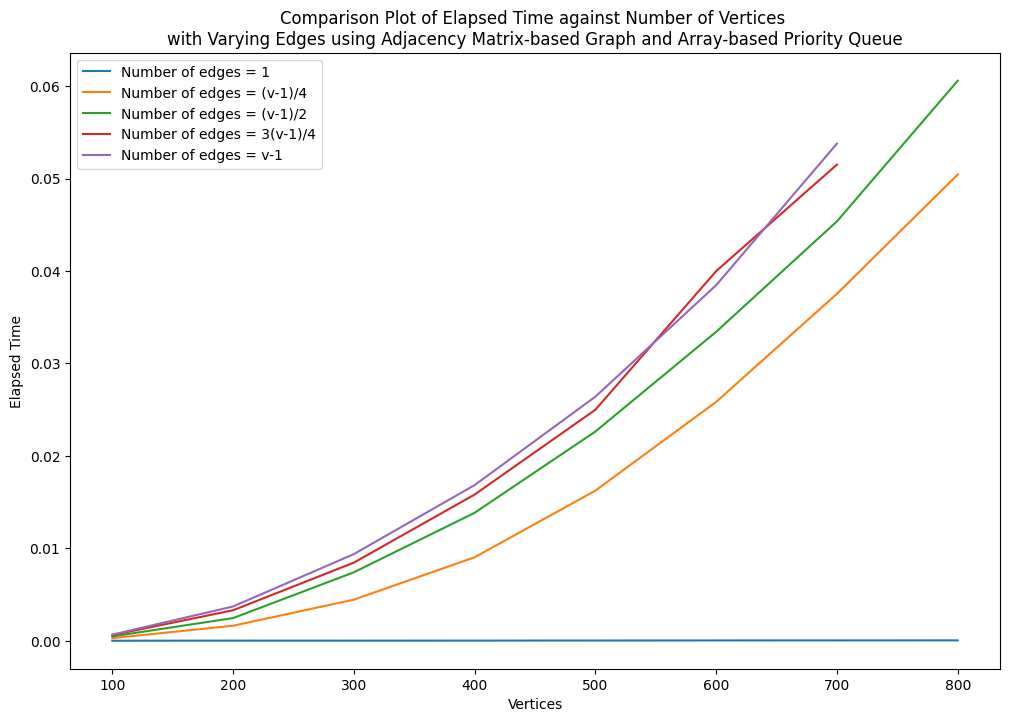

In [89]:
timeMegaList = [[],[],[],[],[]]

count = 0
for index, row in B.iterrows():
    timeMegaList[count].append(float(row["Elapsed Time"]))
    count += 1
    if count == 5:
        count = 0

plt.figure(figsize=(12, 8))
edgeList = ["1", "(v-1)/4", "(v-1)/2", "3(v-1)/4", "v-1"]
for i in range(len(timeMegaList)):
    df = pd.DataFrame()
    df["Vertices"] = verticesMegaList[i]
    df["Elapsed Time"] = timeMegaList[i]

    plot = sb.lineplot(data= df, 
                        x="Vertices", 
                        y="Elapsed Time", 
                        label="Number of edges = %s" %edgeList[i])
    
    plot.set(title="Comparison Plot of Elapsed Time against Number of Vertices \nwith Varying Edges using Adjacency Matrix-based Graph and Array-based Priority Queue")